# Kaggle competitions process

Kaggle is the most famous platform for Data Science competitions. Taking part in such competitions allows you to work with real-world datasets, explore various machine learning problems, compete with other participants and, finally, get invaluable hands-on experience. In this course, you will learn how to approach and structure any Data Science competition. You will be able to select the correct local validation scheme and to avoid overfitting. Moreover, you will master advanced feature engineering together with model ensembling approaches. All these techniques will be practiced on Kaggle competitions datasets.

In [1]:
# Import pandas
import pandas as pd

# Read train data
train = pd.read_csv('demand_forecasting_train_1_month.csv')

# Look at the shape of the data
print('Train shape:', train.shape)

# Look at the head() of the data
print(train.head())

Train shape: (15500, 5)
       id        date  store  item  sales
0  100000  2017-12-01      1     1     19
1  100001  2017-12-02      1     1     16
2  100002  2017-12-03      1     1     31
3  100003  2017-12-04      1     1      7
4  100004  2017-12-05      1     1     20


In [2]:
import pandas as pd

# Read the test data
test = pd.read_csv('demand_forecasting_test.csv')

# Print train and test columns
print('Train columns:', train.columns.tolist())
print('Test columns:', test.columns.tolist())

Train columns: ['id', 'date', 'store', 'item', 'sales']
Test columns: ['id', 'date', 'store', 'item']


In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest object
rf = RandomForestRegressor()

# Train a model
rf.fit(X=train[['store', 'item']], y=train['sales'])

RandomForestRegressor()

In [5]:
# Get predictions for the test set
test['sales'] = rf.predict(test[['store', 'item']])

# Write test predictions using the sample_submission format
test[['id', 'sales']].to_csv('kaggle_submission.csv', index=False)

In [7]:
kaggle = pd.read_csv('kaggle_submission.csv')
kaggle.head()

,id,sales
0,0,17.201068
1,1,17.201068
2,2,17.201068
3,3,17.201068
4,4,17.201068


## Train XGBoost models

In [10]:
!pip install xgboost

In [13]:
import xgboost as xgb

# Create DMatrix on train data
dtrain = xgb.DMatrix(data=train[['store', 'item']],
                     label=train['sales'])

# Define xgboost parameters
params2 = {'objective': 'reg:linear',
          'max_depth': 2,
          'silent': 1}

# Train xgboost model
xg_depth_2 = xgb.train(params=params2, dtrain=dtrain)

[18:52:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[18:52:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [14]:
# Define xgboost parameters
params8 = {'objective': 'reg:linear',
          'max_depth': 8,
          'silent': 1}

# Train xgboost model
xg_depth_8 = xgb.train(params=params8, dtrain=dtrain)

[18:52:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[18:52:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [15]:
# Define xgboost parameters
params15 = {'objective': 'reg:linear',
          'max_depth': 15,
          'silent': 1}

# Train xgboost model
xg_depth_15 = xgb.train(params=params15, dtrain=dtrain)

[18:52:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[18:52:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




## Explore overfitting XGBoost

In [16]:
from sklearn.metrics import mean_squared_error

dtrain = xgb.DMatrix(data=train[['store', 'item']])
dtest = xgb.DMatrix(data=test[['store', 'item']])

# For each of 3 trained models
for model in [xg_depth_2, xg_depth_8, xg_depth_15]:
    # Make predictions
    train_pred = model.predict(dtrain)     
    test_pred = model.predict(dtest)          
    
    # Calculate metrics
    mse_train = mean_squared_error(train['sales'], train_pred)                  
    mse_test = mean_squared_error(test['sales'], test_pred)
    print('MSE Train: {:.3f}. MSE Test: {:.3f}'.format(mse_train, mse_test))

MSE Train: 331.064. MSE Test: 249.623
MSE Train: 112.057. MSE Test: 30.592
MSE Train: 84.952. MSE Test: 3.536


**So, you see that the third model with depth 15 is already overfitting. It has considerably lower train error compared to the second model, however test error is higher.**

# Dive into the Competition

In [18]:
import numpy as np

# Import MSE from sklearn
from sklearn.metrics import mean_squared_error

# Define your own MSE function
def own_mse(y_true, y_pred):
  	# Raise differences to the power of 2
    squares = np.power(y_true - y_pred, 2)
    # Find mean over all observations
    err = np.mean(squares)
    return err

In [19]:
import numpy as np

# Import log_loss from sklearn
from sklearn.metrics import log_loss

# Define your own LogLoss function
def own_logloss(y_true, prob_pred):
  	# Find loss for each observation
    terms = y_true * np.log(prob_pred) + (1 - y_true) * np.log(1 - prob_pred)
    # Find mean over all observations
    err = np.mean(terms) 
    return -err

## EDA statistics

In [20]:
train = pd.read_csv('taxi_train_chapter_4.csv')
test = pd.read_csv('taxi_test_chapter_4.csv')

In [21]:
# Shapes of train and test data
print('Train shape:', train.shape)
print('Test shape:', test.shape)

# Train head()
print(train.head())

Train shape: (20000, 8)
Test shape: (9914, 7)
   id  fare_amount          pickup_datetime  pickup_longitude  \
0   0          4.5  2009-06-15 17:26:21 UTC        -73.844311   
1   1         16.9  2010-01-05 16:52:16 UTC        -74.016048   
2   2          5.7  2011-08-18 00:35:00 UTC        -73.982738   
3   3          7.7  2012-04-21 04:30:42 UTC        -73.987130   
4   4          5.3  2010-03-09 07:51:00 UTC        -73.968095   

   pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  
0        40.721319         -73.841610         40.712278                1  
1        40.711303         -73.979268         40.782004                1  
2        40.761270         -73.991242         40.750562                2  
3        40.733143         -73.991567         40.758092                1  
4        40.768008         -73.956655         40.783762                1  


In [22]:
# Describe the target variable
print(train.fare_amount.describe())

# Train distribution of passengers within rides
print(train.passenger_count.value_counts())

count    20000.000000
mean        11.303321
std          9.541637
min         -3.000000
25%          6.000000
50%          8.500000
75%         12.500000
max        180.000000
Name: fare_amount, dtype: float64
1    13999
2     2912
5     1327
3      860
4      420
6      407
0       75
Name: passenger_count, dtype: int64


## EDA plots

In [37]:
def haversine_distance(train):    
    data = [train]    
    lat1, long1, lat2, long2 = 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'    
    for i in data:
        R = 6371  #radius of earth in kilometers      
        phi1 = np.radians(i[lat1])       
        phi2 = np.radians(i[lat2])    
        delta_phi = np.radians(i[lat2]-i[lat1])       
        delta_lambda = np.radians(i[long2]-i[long1])    
    #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
    a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2    
    #c = 2 * atan2( √a, √(1−a) )       
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))  
    #d = R*c    
    d = (R * c) #in kilometers       
    return d

In [40]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

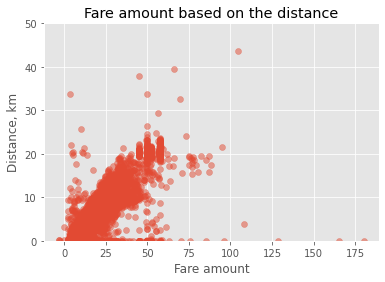

In [41]:
# Calculate the ride distance
train['distance_km'] = haversine_distance(train)

# Draw a scatterplot
plt.scatter(x=train['fare_amount'], y=train['distance_km'], alpha=0.5)
plt.xlabel('Fare amount')
plt.ylabel('Distance, km')
plt.title('Fare amount based on the distance')

# Limit on the distance
plt.ylim(0, 50)
plt.show()

**It's obvious now that there is a clear dependency between ride distance and fare amount. So, ride distance is, probably, a good feature. Let's find some others!**

**Another idea that comes to mind is that the price of a ride could change during the day.**

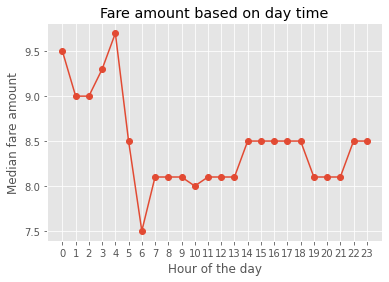

In [43]:
# Create hour feature
train['pickup_datetime'] = pd.to_datetime(train.pickup_datetime)
train['hour'] = train.pickup_datetime.dt.hour

# Find median fare_amount for each hour
hour_price = train.groupby('hour', as_index=False)['fare_amount'].median()

# Plot the line plot
plt.plot(hour_price['hour'], hour_price['fare_amount'], marker='o')
plt.xlabel('Hour of the day')
plt.ylabel('Median fare amount')
plt.title('Fare amount based on day time')
plt.xticks(range(24))
plt.show()

**We see that prices are a bit higher during the night. It is a good indicator that we should include the "hour" feature in the final model, or at least add a binary feature "is_night"**

## K-fold cross-validation

In [49]:
# Import KFold
from sklearn.model_selection import KFold

# Create a KFold object
kf = KFold(n_splits=3, shuffle=True, random_state=123)

# Loop through each split
fold = 0
for train_index, test_index in kf.split(train):
    # Obtain training and testing folds
    cv_train, cv_test = train.iloc[train_index], train.iloc[test_index]
    print('Fold: {}'.format(fold))
    print('CV train shape: {}'.format(cv_train.shape))
    fold += 1

Fold: 0
CV train shape: (973, 17)
Fold: 1
CV train shape: (973, 17)
Fold: 2
CV train shape: (974, 17)


## Stratified K-fold

In [53]:
# Import StratifiedKFold
from sklearn.model_selection import StratifiedKFold

# Create a StratifiedKFold object
str_kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=123)

# Loop through each split
fold = 0
for train_index, test_index in str_kf.split(train, train['SalePrice']):
    # Obtain training and testing folds
    cv_train, cv_test = train.iloc[train_index], train.iloc[test_index]
    print('Fold: {}'.format(fold))
    print('CV train shape: {}'.format(cv_train.shape))
    fold += 1

Fold: 0
CV train shape: (973, 17)
Fold: 1
CV train shape: (973, 17)
Fold: 2
CV train shape: (974, 17)


C:\Users\anoop\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


In [54]:
train = pd.read_csv('demand_forecasting_train_1_month.csv')

## Time K-fold

In [56]:
from sklearn.model_selection import TimeSeriesSplit

# Create TimeSeriesSplit object
time_kfold = TimeSeriesSplit(n_splits=3)

# Sort train data by date
train = train.sort_values('date')

# Iterate through each split
fold = 0
for train_index, test_index in time_kfold.split(train):
    cv_train, cv_test = train.iloc[train_index], train.iloc[test_index]
    
    print('Fold :', fold)
    print('Train date range: from {} to {}'.format(cv_train.date.min(), cv_train.date.max()))
    print('Test date range: from {} to {}\n'.format(cv_test.date.min(), cv_test.date.max()))
    fold += 1

Fold : 0
Train date range: from 2017-12-01 to 2017-12-08
Test date range: from 2017-12-08 to 2017-12-16

Fold : 1
Train date range: from 2017-12-01 to 2017-12-16
Test date range: from 2017-12-16 to 2017-12-24

Fold : 2
Train date range: from 2017-12-01 to 2017-12-24
Test date range: from 2017-12-24 to 2017-12-31



## Overall validation score

In [58]:
def get_fold_mse(train, kf):
    mse_scores = []
    for train_index, test_index in kf.split(train):
        fold_train, fold_test = train.loc[train_index], train.loc[test_index]
        rf = RandomForestRegressor(n_estimators=10, random_state=123)
        rf.fit(X=fold_train[['store', 'item']], y=fold_train['sales'])
        pred = rf.predict(fold_test[['store', 'item']])
        fold_score = round(mean_squared_error(fold_test['sales'], pred), 5)
        mse_scores.append(fold_score)
        return mse_scores


In [62]:
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

# Sort train data by date
train = train.sort_values('date')

# Initialize 3-fold time cross-validation
kf = TimeSeriesSplit(n_splits=3)

# Get MSE scores for each cross-validation split
mse_scores = get_fold_mse(train, kf)

print('Mean validation MSE: {:.5f}'.format(np.mean(mse_scores)))
print('MSE by fold: {}'.format(mse_scores))
print('Overall validation MSE: {:.5f}'.format(np.mean(mse_scores) + np.std(mse_scores)))

Mean validation MSE: 890.30336
MSE by fold: [890.30336]
Overall validation MSE: 890.30336


# Feature Engineering

## Arithmetical features

In [74]:
def get_kfold_rmse(house_train):
    mse_scores = []
    for train_index, test_index in kf.split(house_train):
        house_train = house_train.fillna(0)
        feats = [x for x in house_train.columns if x not in ['Id', 'SalePrice', 'RoofStyle', 'CentralAir']]
        fold_train, fold_test = house_train.loc[train_index], house_train.loc[test_index]
        # Fit the data and make predictions
        # Create a Random Forest object
        rf = RandomForestRegressor(n_estimators=10, min_samples_split=10, random_state=123)
        # Train a model
        rf.fit(X=fold_train[feats], y=fold_train['SalePrice'])
        # Get predictions for the test
        pred = rf.predict(fold_test[feats])
        fold_score = mean_squared_error(fold_test['SalePrice'], pred)
        mse_scores.append(np.sqrt(fold_score))
        return round(np.mean(mse_scores) + np.std(mse_scores), 2)


In [68]:
house_train = pd.read_csv('house_prices_train.csv')
house_test = pd.read_csv('house_prices_test.csv')

In [76]:
# Look at the initial RMSE
print('RMSE before feature engineering:', get_kfold_rmse(house_train))

RMSE before feature engineering: 41058.01


In [77]:
taxi_train = pd.read_csv('taxi_train_chapter_4.csv')
taxi_test = pd.read_csv('taxi_test_chapter_4.csv')

In [79]:
# Concatenate train and test together
taxi = pd.concat([taxi_train, taxi_test])

# Convert pickup date to datetime object
taxi['pickup_datetime'] = pd.to_datetime(taxi['pickup_datetime'])

# Create a day of week feature
taxi['dayofweek'] = taxi['pickup_datetime'].dt.dayofweek

# Create an hour feature
taxi['hour'] = taxi['pickup_datetime'].dt.hour

# Split back into train and test
new_taxi_train = taxi[taxi['id'].isin(taxi_train['id'])]
new_taxi_test = taxi[taxi['id'].isin(taxi_test['id'])]

## Label encoding

In [80]:
# Concatenate train and test together
houses = pd.concat([house_train, house_test])

# Label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Create new features
houses['RoofStyle_enc'] = le.fit_transform(houses["RoofStyle"])
houses['CentralAir_enc'] = le.fit_transform(houses["CentralAir"])

# Look at new features
print(houses[['RoofStyle', 'RoofStyle_enc', 'CentralAir', 'CentralAir_enc']].head())

  RoofStyle  RoofStyle_enc CentralAir  CentralAir_enc
0     Gable              1          Y               1
1     Gable              1          Y               1
2     Gable              1          Y               1
3     Gable              1          Y               1
4     Gable              1          Y               1


**You can see that categorical variables have been label encoded. However, as you already know, label encoder is not always a good choice for categorical variables.**


## One-Hot encoding

In [81]:
# Look at feature distributions
print(houses['RoofStyle'].value_counts(), '\n')
print(houses['CentralAir'].value_counts(), '\n')

Gable      2310
Hip         551
Gambrel      22
Flat         20
Mansard      11
Shed          5
Name: RoofStyle, dtype: int64 

Y    2723
N     196
Name: CentralAir, dtype: int64 



In [82]:
# Label encode binary 'CentralAir' feature
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
houses['CentralAir_enc'] = le.fit_transform(houses['CentralAir'])

# Create One-Hot encoded features
ohe = pd.get_dummies(houses['RoofStyle'], prefix='RoofStyle')

# Concatenate OHE features to houses
houses = pd.concat([houses, ohe], axis=1)

# Look at OHE features
print(houses[[col for col in houses.columns if 'RoofStyle' in col]].head(3))

  RoofStyle  RoofStyle_enc  RoofStyle_Flat  RoofStyle_Gable  \
0     Gable              1               0                1   
1     Gable              1               0                1   
2     Gable              1               0                1   

   RoofStyle_Gambrel  RoofStyle_Hip  RoofStyle_Mansard  RoofStyle_Shed  
0                  0              0                  0               0  
1                  0              0                  0               0  
2                  0              0                  0               0  


## Mean target encoding

In [83]:
def test_mean_target_encoding(train, test, target, categorical, alpha=5):
    # Calculate global mean on the train data
    global_mean = train[target].mean()
    
    # Group by the categorical feature and calculate its properties
    train_groups = train.groupby(categorical)
    category_sum = train_groups[target].sum()
    category_size = train_groups.size()
    
    # Calculate smoothed mean target statistics
    train_statistics = (category_sum + global_mean * alpha) / (category_size + alpha)
    
    # Apply statistics to the test data and fill new categories
    test_feature = test[categorical].map(train_statistics).fillna(global_mean)
    return test_feature.values

In [84]:
def train_mean_target_encoding(train, target, categorical, alpha=5):
    # Create 5-fold cross-validation
    kf = KFold(n_splits=5, random_state=123, shuffle=True)
    train_feature = pd.Series(index=train.index)
    
    # For each folds split
    for train_index, test_index in kf.split(train):
        cv_train, cv_test = train.iloc[train_index], train.iloc[test_index]
      
        # Calculate out-of-fold statistics and apply to cv_test
        cv_test_feature = test_mean_target_encoding(cv_train, cv_test, target, categorical, alpha)
        
        # Save new feature for this particular fold
        train_feature.iloc[test_index] = cv_test_feature       
    return train_feature.values

In [85]:
def mean_target_encoding(train, test, target, categorical, alpha=5):
  
    # Get the train feature
    train_feature = train_mean_target_encoding(train, target, categorical, alpha)
  
    # Get the test feature
    test_feature = test_mean_target_encoding(train, test, target, categorical, alpha)
    
    # Return new features to add to the model
    return train_feature, test_feature

# Modeling

## Replicate validation score

In [90]:
from sklearn.model_selection import train_test_split

validation_train, validation_test = train_test_split(taxi_train, test_size = 0.3, random_state = 111)

In [91]:
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt

# Calculate the mean fare_amount on the validation_train data
naive_prediction = np.mean(validation_train['fare_amount'])

# Assign naive prediction to all the holdout observations
validation_test['pred'] = naive_prediction
# Measure the local RMSE
rmse = sqrt(mean_squared_error(validation_test['fare_amount'], validation_test['pred']))
print('Validation RMSE for Baseline I model: {:.3f}'.format(rmse))

<ipython-input-91-2331726e5eec>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_test['pred'] = naive_prediction


Validation RMSE for Baseline I model: 9.328


## Baseline based on the date

In [94]:
taxi_train['pickup_datetime'] = pd.to_datetime(taxi_train['pickup_datetime'])
taxi_test['pickup_datetime'] = pd.to_datetime(taxi_test['pickup_datetime'])

In [95]:
# Get pickup hour from the pickup_datetime column
taxi_train['hour'] = taxi_train['pickup_datetime'].dt.hour
taxi_test['hour'] = taxi_test['pickup_datetime'].dt.hour

# Calculate average fare_amount grouped by pickup hour 
hour_groups = taxi_train.groupby('hour')['fare_amount'].mean()

# Make predictions on the test set
taxi_test['fare_amount'] = taxi_test.hour.map(hour_groups)

# Write predictions
taxi_test[['id','fare_amount']].to_csv('hour_mean_sub.csv', index=False)

## Baseline based on the gradient boosting

In [96]:
from sklearn.ensemble import RandomForestRegressor

# Select only numeric features
features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
            'dropoff_latitude', 'passenger_count', 'hour']

# Train a Random Forest model
rf = RandomForestRegressor()
rf.fit(taxi_train[features], taxi_train.fare_amount)

# Make predictions on the test data
taxi_test['fare_amount'] = rf.predict(taxi_test[features])

# Write predictions
taxi_test[['id','fare_amount']].to_csv('rf_sub.csv', index=False)

## Hyperparamater tuning - Grid Search

In [97]:
def get_cv_score(train, params):
    # Create KFold object
    kf = KFold(n_splits=3, shuffle=True, random_state=123)
    rmse_scores = []
    # Loop through each split
    for train_index, test_index in kf.split(train):
        cv_train, cv_test = train.iloc[train_index], train.iloc[test_index]
        # Train a Gradient Boosting model
        gb = GradientBoostingRegressor(random_state=123, **params).fit(cv_train[features], cv_train.fare_amount)
        # Make predictions on the test data
        pred = gb.predict(cv_test[features])
        fold_score = np.sqrt(mean_squared_error(cv_test['fare_amount'], pred))
        rmse_scores.append(fold_score)
        return np.round(np.mean(rmse_scores) + np.std(rmse_scores), 5)


In [100]:
from sklearn.ensemble import GradientBoostingRegressor

# Possible max depth values
max_depth_grid = [3,6,9,12,15]
results = {}

# For each value in the grid
for max_depth_candidate in max_depth_grid:
    # Specify parameters for the model
    params = {'max_depth': max_depth_candidate}

    # Calculate validation score for a particular hyperparameter
    validation_score = get_cv_score(taxi_train, params)

    # Save the results for each max depth value
    results[max_depth_candidate] = validation_score   
print(results)

{3: 5.82386, 6: 5.44792, 9: 5.39716, 12: 5.51041, 15: 5.72068}


**We have a validation score for each value in the grid. It's clear that the optimal max depth value is located somewhere between 3 and 6. The next step could be to use a smaller grid, for example [3, 4, 5, 6] and repeat the same process. Moving from larger to smaller grids allows us to find the most optimal values.**

In [101]:
import itertools

# Hyperparameter grids
max_depth_grid = [3, 5, 7]
subsample_grid = [ 0.8, 0.9, 1.0]
results = {}

# For each couple in the grid
for max_depth_candidate, subsample_candidate in itertools.product(max_depth_grid, subsample_grid):
    params = {'max_depth': max_depth_candidate,
              'subsample': subsample_candidate}
    validation_score = get_cv_score(taxi_train, params)
    # Save the results for each couple
    results[(max_depth_candidate, subsample_candidate)] = validation_score   
print(results)

{(3, 0.8): 5.79662, (3, 0.9): 5.79932, (3, 1.0): 5.82386, (5, 0.8): 5.46246, (5, 0.9): 5.55363, (5, 1.0): 5.41156, (7, 0.8): 5.52432, (7, 0.9): 5.50209, (7, 1.0): 5.4401}


**We can see that tuning multiple hyperparameters simultaneously achieves better results. In the previous step, tuning only the max_depth parameter gave the best RMSE of $6.50. With max_depth equal to 7 and subsample equal to 0.8, the best RMSE is now $6.16. However, do not spend too much time on the hyperparameter tuning at the beginning of the competition! Another approach that almost always improves your solution is model ensembling.

## Model Ensembling

In [102]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

# Train a Gradient Boosting model
gb = GradientBoostingRegressor().fit(taxi_train[features], taxi_train.fare_amount)

# Train a Random Forest model
rf = RandomForestRegressor().fit(taxi_train[features],taxi_train.fare_amount)

# Make predictions on the test data
taxi_test['gb_pred'] = gb.predict(taxi_test[features])
taxi_test['rf_pred'] = rf.predict(taxi_test[features])

# Find mean of model predictions
taxi_test['blend'] = (taxi_test['gb_pred'] + taxi_test['rf_pred']) / 2
print(taxi_test[['gb_pred', 'rf_pred', 'blend']].head(3))

    gb_pred  rf_pred     blend
0  8.084739    8.963  8.523869
1  8.758979    8.851  8.804989
2  8.084739    5.664  6.874369


**Blending allows you to get additional score improvements almost for free just by averaging multiple models predictions**

## Model stacking I

**To implement the stacking approach, we need to follow the 6 steps below:**

- Split train data into two parts
- Train multiple models on Part 1
- Make predictions on Part 2
- Make predictions on the test data
- Train a new model on Part 2 using predictions as features
- Make predictions on the test data using the 2nd level model

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

# Split train data into two parts
part_1, part_2 = train_test_split(taxi_train, test_size=0.5, random_state=123)

# Train a Gradient Boosting model on Part 1
gb = GradientBoostingRegressor().fit(part_1[features], part_1.fare_amount)

# Train a Random Forest model on Part 1
rf = RandomForestRegressor().fit(part_1[features], part_1.fare_amount)

In [104]:
# Make predictions on the Part 2 data
part_2['gb_pred'] = gb.predict(part_2[features])
part_2['rf_pred'] = rf.predict(part_2[features])

# Make predictions on the test data
test['gb_pred'] = gb.predict(taxi_test[features])
test['rf_pred'] = rf.predict(taxi_test[features])

<ipython-input-104-2b6b0a2f0df5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part_2['gb_pred'] = gb.predict(part_2[features])
<ipython-input-104-2b6b0a2f0df5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part_2['rf_pred'] = rf.predict(part_2[features])


## Model Stacking II

In [106]:
from sklearn.linear_model import LinearRegression

# Create linear regression model without the intercept
lr = LinearRegression(fit_intercept=False)

# Train 2nd level model on the Part 2 data
lr.fit(part_2[['gb_pred', 'rf_pred']], part_2.fare_amount)

# Make stacking predictions on the test data
taxi_test['stacking'] = lr.predict(taxi_test[['gb_pred', 'rf_pred']])

# Look at the model coefficients
print(lr.coef_) 

[-0.05926844  1.0607865 ]
